### Donor Data Set
 1. How much was donated and what was the average donation?
 2. How did the donations differ between candidates?
 3. How did the donations differ between Democrats and Republicans?
 4. What were the demographics of the donors?
 5. Is there a pattern to donation amounts?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df.head()

C:\Users\lonj7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [3]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [4]:
donor_df.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


### 1. How much was donated and what was the average donation?

In [5]:
donor_df['contb_receipt_amt'].mean()

298.2351500951093

## 2. How did the donations differ between candidates

In [6]:
donor_df.groupby(['cand_nm']).sum().sort_values('contb_receipt_amt', ascending = False)

# line up ascending = False

,contb_receipt_amt,file_num
cand_nm,,
"Obama, Barack",1.335026e+08,460087249016
"Romney, Mitt",8.521925e+07,82976378730
"Paul, Ron",2.072257e+07,112129027290
"Perry, Rick",1.841151e+07,10276997466
"Gingrich, Newt",1.201183e+07,36683543984
"Santorum, Rick",1.072809e+07,36100438297
"Cain, Herman",7.047265e+06,15580578389
"Pawlenty, Timothy",4.255054e+06,3424965230
"Huntsman, Jon",3.204350e+06,3157784642


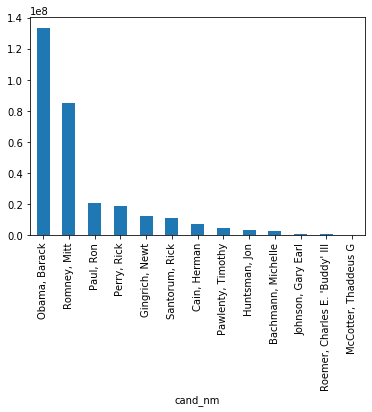

In [7]:
# visualize the ambount of donations.
temp_df = donor_df.groupby(['cand_nm']).sum().sort_values('contb_receipt_amt', ascending = False)

# 1
temp_df['contb_receipt_amt'].plot(kind = 'bar')

In [8]:
# try another way

###  3. How did the donations differ between Democrats 

In [9]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)
# make new feature called 'Party'

In [10]:
temp2_df = donor_df[['Party', 'contb_receipt_amt']].groupby(['Party']).sum().sort_values(by = 'contb_receipt_amt', ascending = False)
temp2_df.head()

,contb_receipt_amt
Party,
Republican,1.652488e+08
Democrat,1.335026e+08


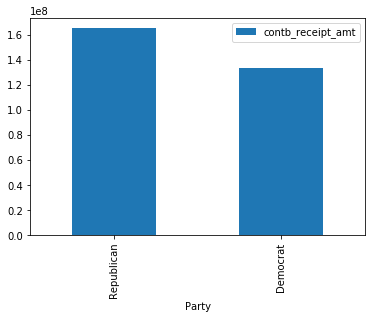

In [11]:
temp2_df.plot(kind = 'bar')

### 4. What were the demographics of the donors?

In [35]:
occupation_df = donor_df[['contbr_occupation', 'Party', 'contb_receipt_amt']].groupby('contbr_occupation').agg('sum')
occupation_df.head()

,contb_receipt_amt
contbr_occupation,
MIXED-MEDIA ARTIST / STORYTELLER,100.0
AREA VICE PRESIDENT,250.0
RESEARCH ASSOCIATE,100.0
TEACHER,500.0
THERAPIST,3900.0


In [36]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [37]:
# Check size
occupation_df.shape

(45073, 2)

In [38]:
# Too large to display effectively with a small, static visualization.

# Set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.shape

(31, 2)

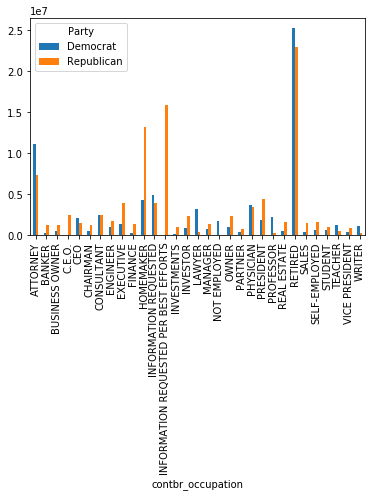

In [39]:
occupation_df.plot(kind='bar')

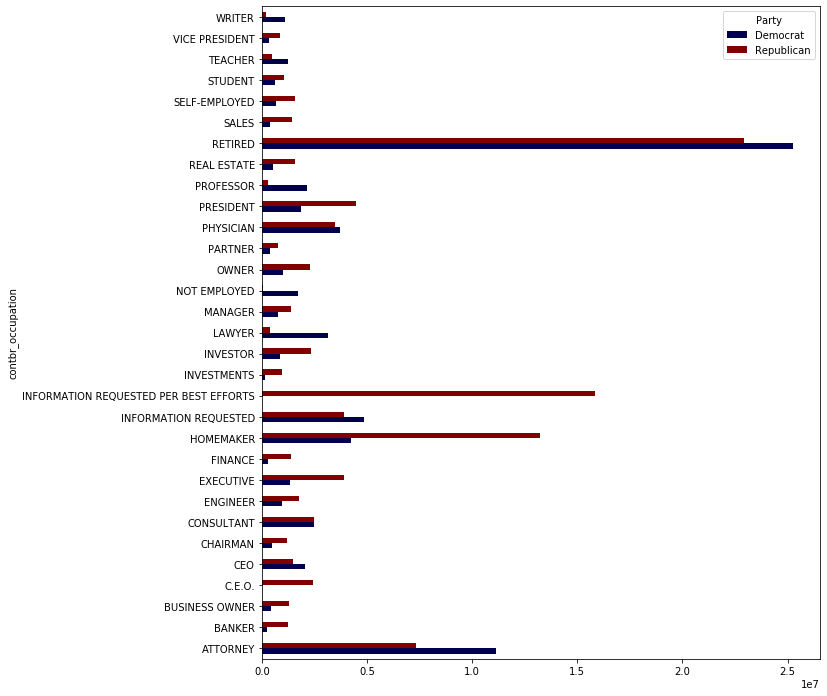

In [40]:
# Horizontal plot, use a convienently colored cmap
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [43]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7343540.33
BANKER,224084.40,1238818.73
BUSINESS OWNER,449979.30,1286532.43
C.E.O.,1690.00,2431528.11
CEO,2069784.79,1501157.41
